In [24]:
import os 
import pandas as pd
import numpy as np 
import random
from random import choice
import PIL
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications import LeNet
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
data_dir = "./data"
train_dir= os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir= os.path.join(data_dir, "test")

In [3]:
"""random_image = choice(train_data)

with Image.open(random_image) as img : 
    m, n= img.size
    plt.imshow(img)
    plt.title(f"Random Image from {random_image_path} (Height={n}, Width={m})")
    plt.show()
    
print(f"Randomly selected image dimensions: height (n) = {n}, width (m) = {m}")
"""

'random_image = choice(train_data)\n\nwith Image.open(random_image) as img : \n    m, n= img.size\n    plt.imshow(img)\n    plt.title(f"Random Image from {random_image_path} (Height={n}, Width={m})")\n    plt.show()\n    \nprint(f"Randomly selected image dimensions: height (n) = {n}, width (m) = {m}")\n'

In [4]:
#starting with Lenet architecture 
#data preprocessing 
#define the image dimensions suitable for LeNet 
img_height, img_width = 28, 28
train_datagen = ImageDataGenerator (rescale = 1./255, 
                                   shear_range =0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   target_size=(img_height,img_width),
                                                   batch_size=32,
                                                   class_mode="binary",
                                                   color_mode="grayscale")

val_generator = val_datagen.flow_from_directory(val_dir, 
                                                   target_size=(img_height,img_width),
                                                   batch_size=32,
                                                   class_mode="binary",
                                               color_mode="grayscale")

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                   target_size=(img_height,img_width),
                                                   batch_size=32,
                                                   class_mode="binary",
                                                 color_mode="grayscale")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# model building 

## LeNet architecture 

In [20]:
def lenet5(input_shape=(28, 28, 1), num_classes=1):
    model = Sequential([
        Conv2D(6, (5, 5), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(16, (5, 5), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(num_classes, activation='sigmoid') 
  ])
    return model


In [21]:
model = lenet5(input_shape=(img_width, img_height, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\HP\.conda\envs\myenvirnmt\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
# training the lenet model 
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10, 
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10


C:\Users\HP\.conda\envs\myenvirnmt\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 803ms/step - accuracy: 0.7347 - loss: 0.5543 - val_accuracy: 0.6250 - val_loss: 0.5662
Epoch 2/10


C:\Users\HP\.conda\envs\myenvirnmt\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.5662
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 129s 756ms/step - accuracy: 0.8771 - loss: 0.2865 - val_accuracy: 0.8125 - val_loss: 0.4495
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4495
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 749ms/step - accuracy: 0.8963 - loss: 0.2583 - val_accuracy: 0.7500 - val_loss: 0.5586
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.5586
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 125s 729ms/step - accuracy: 0.9093 - loss: 0.2181 - val_accuracy: 0.8125 - val_loss: 0.4992
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4992
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 125s 732ms/step - accuracy: 0.9

In [25]:
# evaluating the model performanceon the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 656ms/step - accuracy: 0.8375 - loss: 0.3929
Test Loss: 0.3600330948829651
Test Accuracy: 0.8493589758872986


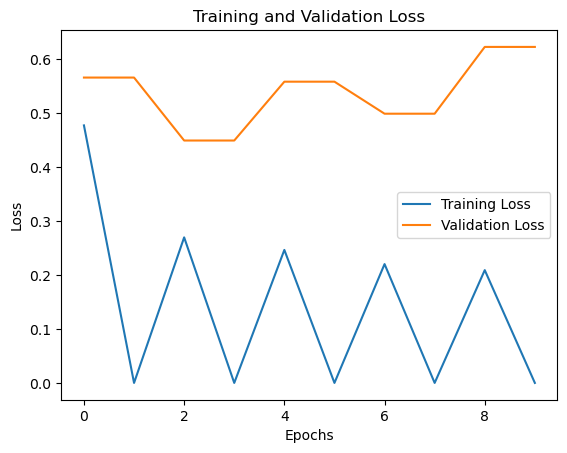

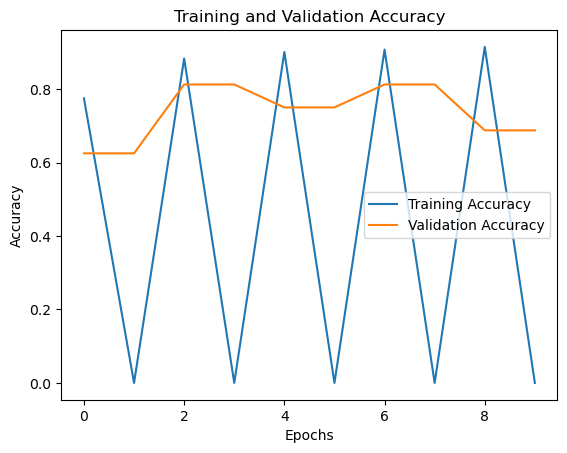

In [26]:
# plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [27]:
model.save("pneumonia_classification_model.h5")

In [28]:
import os
print("Current working directory:", os.getcwd())
import os
print("Files in the current directory:")
print(os.listdir())


Current working directory: C:\Users\HP\Desktop\belkbir\Pneumonia Prediction using CNN
Files in the current directory:
['.git', '.ipynb_checkpoints', 'chest_xray', 'data', 'Pneumonia Prediction using Pythorch.ipynb', 'pneumonia_classification_model.h5', 'Untitled.ipynb']


testing the model on a random image 

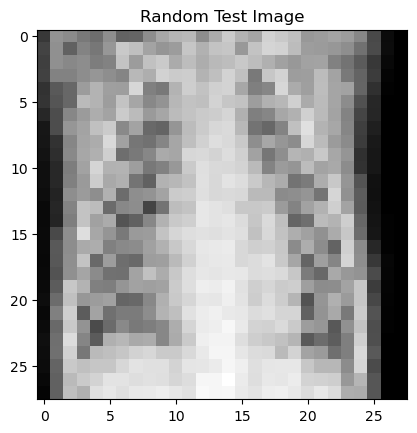

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Predicted Class: Pneumonia
True Label: Pneumonia


C:\Users\HP\AppData\Local\Temp\ipykernel_11664\2425530238.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(prediction[0] > 0.5)


In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# loading the saved model
model = load_model("pneumonia_classification_model.h5")

# geting a random batch from the test generator
batch = next(iter(test_generator))

# Select a random index from the batch
random_index = random.randint(0, len(batch[0]) - 1)

# geeting the image and corresponding true label
random_image = batch[0][random_index]  # this is the image
true_label = batch[1][random_index]  # this is the true label

# displaying the random image
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title("Random Test Image")
plt.show()

# making a prediction using the model
prediction = model.predict(np.expand_dims(random_image, axis=0))

# convert prediction to a class (binary: 0 or 1)  binary classification
predicted_class = int(prediction[0] > 0.5) 

# determine the name of the class (0 = Normal, 1 = Pneumonia)
class_names = ["Normal", "Pneumonia"]

# print the prediction and the true label to comapre 
print(f"Predicted Class: {class_names[predicted_class]}")
print(f"True Label: {class_names[int(true_label)]}")


## the AlexNet Architecture

In [30]:
# define image dimensions for AlexNet
img_height, img_width = 224, 224

# data augmentation and preprocessing for Alexnet 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# data generators with the correct target size for AlexNet
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
     class_mode="binary")

val_generator = val_datagen.flow_from_directory(val_dir, 
                                                   target_size=(img_height,img_width),
                                                   batch_size=32,
                                                   class_mode="binary")

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                   target_size=(img_height,img_width),
                                                   batch_size=32,
                                                   class_mode="binary")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [31]:
def alexnet(input_shape=(224, 224, 3), num_classes=1):
    model = models.Sequential([
        # first convolutional layer
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((3, 3), strides=2),

        # second convolutional layer
        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),

        # third, fourth, and fifth convolutional layers
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),

        # fully connected layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        # output layer for binary classification
        layers.Dense(num_classes, activation='sigmoid')  # Use sigmoid for binary classification
    ])
    return model


In [32]:
# Compiling the AlexNet model
model = alexnet(input_shape=(img_width, img_height, 3))
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# ttraining the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10, 
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)


C:\Users\HP\.conda\envs\myenvirnmt\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 485s 3s/step - accuracy: 0.7332 - loss: 0.9068 - val_accuracy: 0.6875 - val_loss: 0.8505
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.8505
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 495s 3s/step - accuracy: 0.8357 - loss: 0.3738 - val_accuracy: 0.8125 - val_loss: 0.4460
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4460
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 490s 3s/step - accuracy: 0.8923 - loss: 0.2546 - val_accuracy: 0.8125 - val_loss: 0.4872
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4872
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 465s 3s/step - accuracy: 0.9113 - loss: 0.2176 - val_accuracy: 0.7500 - val_loss: 0.4162
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 -

In [34]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8575 - loss: 0.3368
Test Loss: 0.32320675253868103
Test Accuracy: 0.8653846383094788


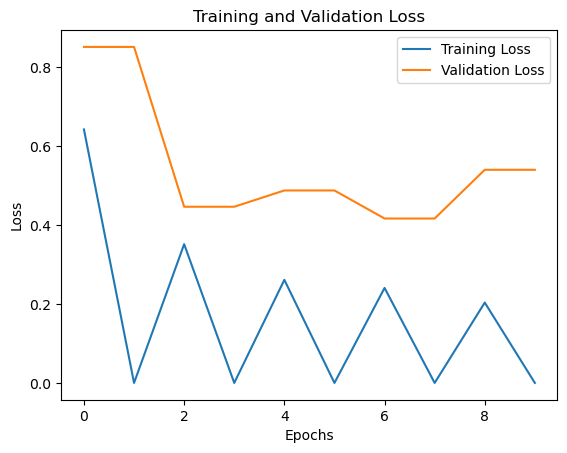

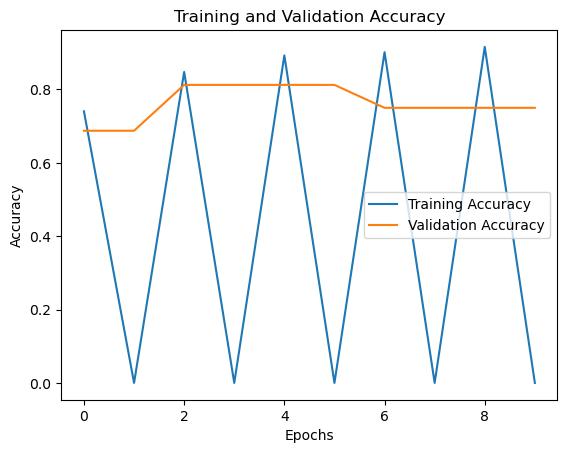

In [36]:
# plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


testing on a random image 

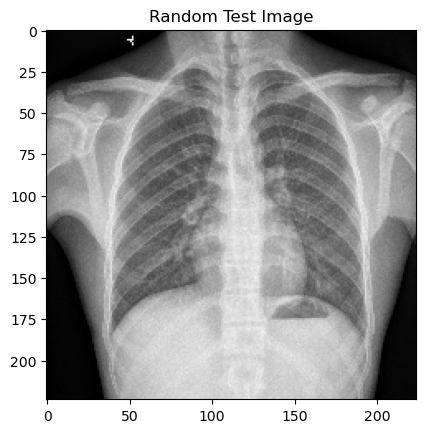

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
Predicted Class: Normal
True Label: Normal


C:\Users\HP\AppData\Local\Temp\ipykernel_11664\585901642.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(prediction[0] > 0.5)  # 0.5 threshold for binary classification


In [37]:
# Get a random batch from the test generator
batch = next(iter(test_generator))

# Select a random index from the batch
random_index = random.randint(0, len(batch[0]) - 1)

# Get the image and corresponding true label
random_image = batch[0][random_index]
true_label = batch[1][random_index]

# Display the random image
plt.imshow(random_image)
plt.title("Random Test Image")
plt.show()

# Make a prediction
prediction = model.predict(np.expand_dims(random_image, axis=0))

# Determine the predicted class 0 normale 1 pneu
predicted_class = int(prediction[0] > 0.5)  

class_names = ["Normal", "Pneumonia"]  

print(f"Predicted Class: {class_names[predicted_class]}")
print(f"True Label: {class_names[int(true_label)]}")


In [38]:
# defining image dimensions for VGGNet
img_height, img_width = 224, 224

# data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="binary"
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [42]:
from tensorflow.keras import layers, models

def simplified_vggnet(input_shape=(224, 224, 3), num_classes=1):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2), strides=2),

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        # Block 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        # Block 5
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        # Fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='sigmoid')  # For binary classification
    ])
    return model


In [41]:
""""
def vggnet(input_shape=(224, 224, 3), num_classes=1):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        # Block 2
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        # Block 3
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        # Block 4
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        # Block 5
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        # Fully connected layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='sigmoid')  # For binary classification
    ])
    return model
"""

In [43]:
# Compiling the VGGNet model
model = simplified_vggnet(input_shape=(img_width, img_height, 3))
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# training the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 571s 3s/step - accuracy: 0.7261 - loss: 0.6119 - val_accuracy: 0.5000 - val_loss: 0.7913
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7913
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 540s 3s/step - accuracy: 0.7376 - loss: 0.5794 - val_accuracy: 0.5000 - val_loss: 0.7643
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7643
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.7423 - loss: 0.5523 - val_accuracy: 0.5000 - val_loss: 0.8237
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.8237
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 553s 3s/step - accuracy: 0.7456 - loss: 0.5694 - val_accuracy: 0.5000 - val_loss: 0.8230
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 -

In [44]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6440 - loss: 0.6638
Test Loss: 0.6829924583435059
Test Accuracy: 0.625


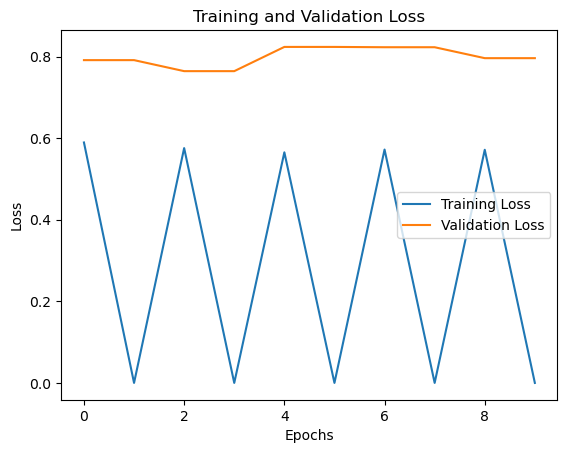

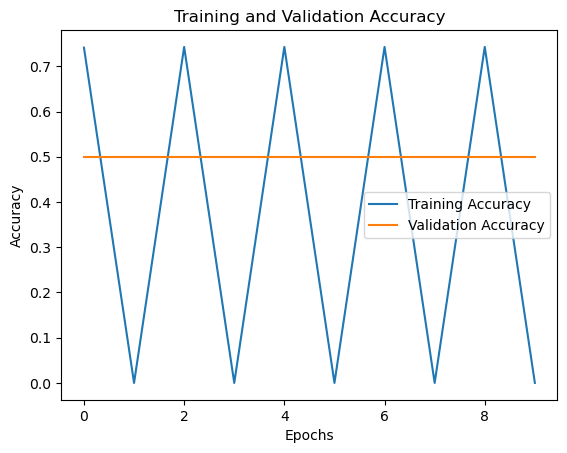

In [45]:
# plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


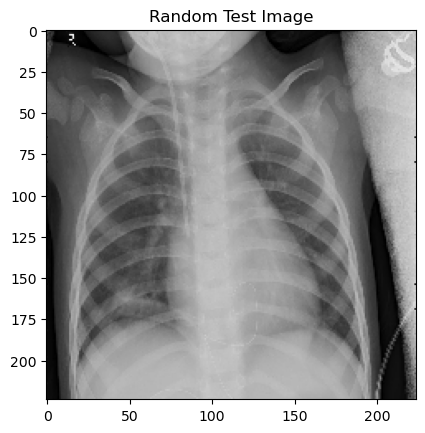

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
Predicted Class: Pneumonia
True Label: Pneumonia


C:\Users\HP\AppData\Local\Temp\ipykernel_11664\1790780023.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(prediction[0] > 0.5)


In [46]:
# Get a random batch from the test generator
batch = next(iter(test_generator))

# Select a random index from the batch
random_index = random.randint(0, len(batch[0]) - 1)

# Get the image and corresponding true label
random_image = batch[0][random_index]
true_label = batch[1][random_index]

# Display the random image
plt.imshow(random_image)
plt.title("Random Test Image")
plt.show()

# Make a prediction
prediction = model.predict(np.expand_dims(random_image, axis=0))

# Determine the predicted class
predicted_class = int(prediction[0] > 0.5)  

class_names = ["Normal", "Pneumonia"]  

print(f"Predicted Class: {class_names[predicted_class]}")
print(f"True Label: {class_names[int(true_label)]}")
